# ***TRABAJO PRACTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

<hr>
<hr>

 Este cuaderno no esta creado para ser entregado tal cómo esta, sino para intentar ayudar y servir de guía para otros compañeros. Si se le va a dar uso, recomiendo mucho quitar los comentarios o editarlos y cambiar el enfoque (por ejemplo la ciudad) según se desee.

<br>

### Primer consigna

&nbsp; Las consignas para este trabajo entregable muestran muchos, ~muchisimos~ errores, y para poder abordalos de forma sistematica, voy a ir agregando notas de ayuda para que los otros compañeros terminen el trabajo de forma rapida, sin perder tiempo en comprender la terminologia errante.
<p>&nbsp; La primer consigna, básicamente pide:
<ol>
<li>Seleccionar una ciudad a partir del DataFrame original (mal llamado "base de datos"): se refiere a simplemente filtrar por el nombre de ciudad elegida.</li>
<li>Hacer una columna con la temperatura promedio de esa ciudad. (En el ejemplo lo hice con todo el DataFrame).</li>
<li>Graficar la temperatura promedio en el tiempo (fecha)</li>
<li>Seleccionar un periodo donde se muestre una temperatura creciente en esa ciudad (problablemente de invierno hacia primavera o primavera hacia verano)</li>
</ol>

<code>1. Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.</code>

<code>Seleccionar una ciudad</code><br>
a. Leemos los datos a partir del archivo .txt en la carpeta de Google Drive. Le damos la codificación que usa e ignoramos las tres primeras entradas que no corresponden a datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url_txt='https://drive.google.com/file/d/1XrxozIFzCFx9oaDlubYMc10H1GWcQhc-/view?usp=drive_link'
url_txt='https://drive.google.com/uc?id=' + url_txt.split('/')[-2]

codificacion = "ISO-8859-1"
df = pd.read_fwf(url_txt, skiprows=3, header=None, names=["FECHA", "TMAX", "TMIN", "NOMBRE"], encoding=codificacion)

df.head()

,FECHA,TMAX,TMIN,NOMBRE
0,29102023,23.0,17.9,AEROPARQUE AERO
1,29102023,22.9,14.2,AZUL AERO
2,29102023,22.1,8.1,BAHIA BLANCA AERO
3,29102023,3.5,-0.3,BARILOCHE AERO
4,29102023,-4.7,-11.6,BASE BELGRANO II


<center>Miercoles 1 de noviembre, 2023:</center>

<center><img src="https://imageupload.io/ib/lKowK69J00U2cNz_1698891276.jpg"></img></center><center><p>&nbsp; No se debe seleccionar una de estás ciudades. Esto va a entrar en conflicto con la <b>tercer consigna</b> ('<i>SI HACEN MÁS DE 27 GRADOS..</i>'). En estás "ciudades" (localidades) no se alcanza una temperatura promedio mayor a 27, inclusive en verano.</p></center>

Digamos que queremos tomar (~~reconstruir una nueva base de datos~~) los datos de Ushuaia. Pueden ser cualquier ciudad (así dice la consigna), así que tome Ushuaia como ejemplo.

In [ ]:
temperatura_ushuaia = df[df["NOMBRE"] == "USHUAIA AERO"]
temperatura_ushuaia.head()

,FECHA,TMAX,TMIN,NOMBRE
110,29102023,5.9,0.2,USHUAIA AERO
229,28102023,7.6,0.8,USHUAIA AERO
348,27102023,8.0,0.3,USHUAIA AERO
467,26102023,5.4,1.3,USHUAIA AERO
586,25102023,10.4,3.2,USHUAIA AERO


<code>y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad.</code>
<br>
b. ¿Cómo se reconstruye algo que todavia no se construyo? Construyendolo primero, y mintiendo con que lo volvimos a construir. Por eso: tenemos que construir una ~~base de datos~~ (para nuestra suerte, no) o mejor dicho, tenemos que crear una <b>columna con las temperaturas promedio de cada día para esa ciudad</b>. Los datos son de Temperatura Maxima (TMAX) y Temperatura Minima (TMIN). Para crear esa nueva columna 'TPROMEDIO', hacemos:
  
  $$ \text{TPROMEDIO} = \frac{TMAX + TMIN}{2}$$

In [ ]:
# Esto cambia todo el DataFrame, no solo para la ciudad de ushuaia.
df['TPROMEDIO'] = (df['TMAX'] + df['TMIN']) / 2

<code>Graficar dichos datos TIEMPO VS TEMPERATURA</code><br>
c. Los datos dados tienen fecha, pero no esta en un formato más o menos graficable. Hay que pasarlos del tipo enteros (int64) a datetime64 (algo que no vimos, pero es muy importante y util para el análisis de datos.). Los errores los force (se vuelven NaT), porque lo importante es graficar las fechas de Ushuaia, no importa si hay otros errores en registros de otras ciudades.

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d%m%Y', errors= 'coerce')

# por lo que vuelvo a declarar la tabla con los datos de ushuaia, para incluir su temperatura promedio por día y la fecha formateada
temperatura_ushuaia = df[df['NOMBRE'] == "USHUAIA AERO"].copy()

<code>Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. </code>
~¿Cómo que seleccionar?~ Para el primer paso y debido a la densidad de los datos, costaria hacer un gráfico de lineas entendible, por lo que podemos por ejemplo hacer un grafico de dispersión. En este caso use un hexagono purpura para los datos.

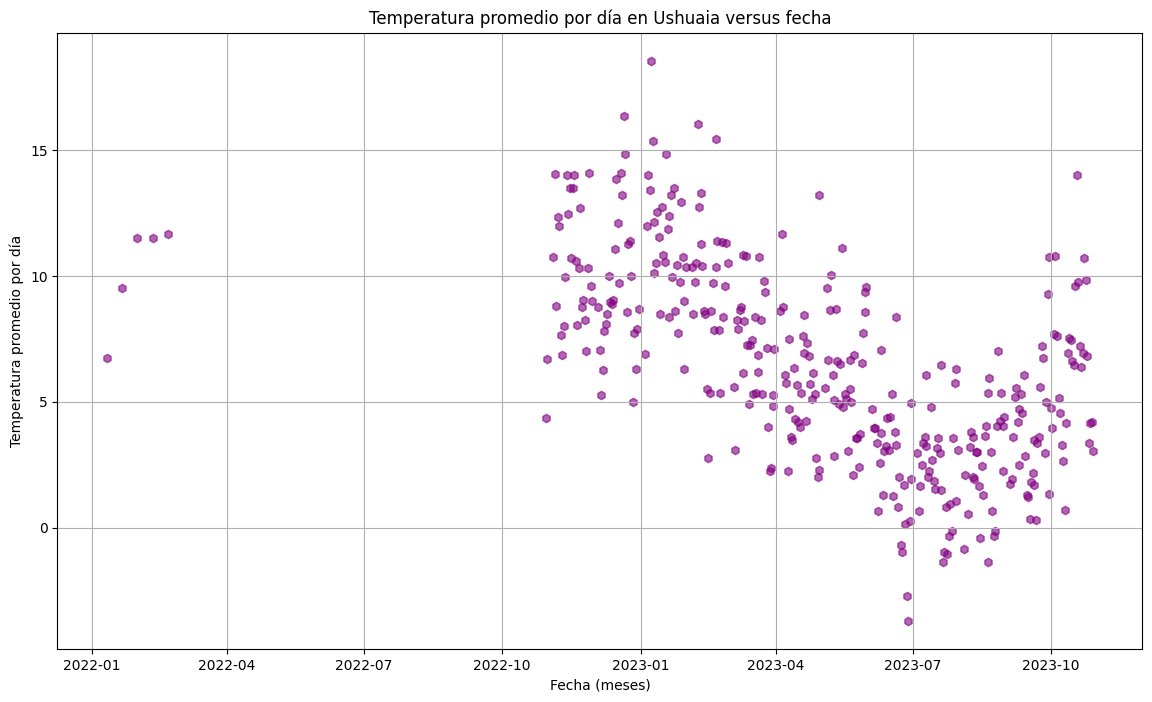

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(temperatura_ushuaia['FECHA'], temperatura_ushuaia['TPROMEDIO'], marker='h', color='purple', linestyle='-', alpha = 0.6)
plt.xlabel('Fecha (meses)')
plt.ylabel('Temperatura promedio por día')
plt.title('Temperatura promedio por día en Ushuaia versus fecha')
plt.grid(True)
plt.show()

<p>&nbsp;Podemos ver que en los datos de ushuaia se muestra un crecimiento en la temperatura entre el mes de Julio hacia Noviembre del año 2023 (2023-07 a 2023-10). Esto es el periodo de invierno hacia verano, lo que representa a la estación de <b>primavera</b>. Este es un periodo de crecimiento en los datos que se puede seleccionar para trabajar en el paso dos. Se puede hacer el mismo procedimiento más o menos de forma similar dependiendo de la ciudad que se haya elegido.</p>

<code>Esto servira para construir una nueva base de datos.</code>

<p>Buenisimo</p>
<br>
<hr>

<br>

### Segunda consigna

<p>Ya tenemos "seleccionada" la fecha con datos de temperatura creciente en una ciudad elegida, en este caso Ushuaia. También tenemos lo que en el trabajo se llama "nueva base de datos" en la variable "temperatura_ushuaia" (un DataFrame de pandas). Podemos ir viendo la segunda consigna parte por parte de la misma forma.</p>

<details><summary><b>2. Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:<b></summary>
<li> VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR, a menor temperatura el precio será menor. Definir el rango del precio del helado y la tasa o porcentaje de incremento del precio</li>

<li>COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.
</li></details>

<code>Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria</code>

&nbsp;Esto significa tomar nuestra ~base de datos~ tabla de datos con las temperaturas en Ushuaia (en el ejemplo) o de la ciudad escogida y agregarle las columnas: "PRECIO DEL KILO DE HELADO" y "COMPRA HELADO". Estas variables/columnas se rellenarian con datos ficticios ("<i>simulación generada</i>") o simulados.
<p> Así que veamos parte por parte. </p>


In [ ]:
# Tenemos nuestra tabla de datos
temperatura_ushuaia.head()

,FECHA,TMAX,TMIN,NOMBRE,TPROMEDIO
110,2023-10-29,5.9,0.2,USHUAIA AERO,3.05
229,2023-10-28,7.6,0.8,USHUAIA AERO,4.20
348,2023-10-27,8.0,0.3,USHUAIA AERO,4.15
467,2023-10-26,5.4,1.3,USHUAIA AERO,3.35
586,2023-10-25,10.4,3.2,USHUAIA AERO,6.80


<code> PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR, a menor temperatura el precio será menor. Definir el rango del precio del helado y la tasa o porcentaje de incremento del precio</code>

Separemos la consigna por partes:
- Crear la variable/columna "PRECIO DEL KILO DE HELADO".
- Rellenar usando una "simulación aleatoria de regresión lineal" (esto es contradictorio).
 <p>&nbsp;Después de haberlo consultarlo con el profesor Miguel, esto se refiere a datos simulados que siguen una <u>relación</u> lineal positiva con la temperatura del día.</p>
- En resumen: hay que crear datos para rellenar una columna inventada ("<i>precios de helado por kg</i>"). La condición es que estos datos pueden tener aleatoriedad, pero tienen que seguir una tendencia con la temperatura: a más temperatura promedio en el dia, más aumenta el precio del helado. Cuando hace frio, el precio del helado va a ser más bajo.


<p>&nbsp;Podemos decir entonces que tenemos que crear datos que muestren una tendencia positiva en relación a la temperatura. Estos datos tienen que tener valores más o menos aleatorios (una variabilidad) pero tienen que seguir una tendencia lineal: a más temperatura, más precio, y a menos temperatura, menos precio. </p>

<br>

<p> Podemos hacer datos ficticios que sigan el comportamiento de una recta f(x) = a + bx + e. Esta ecuación seria dada por:</p><br>
  
  $$ \text{Precio del kilo de helado} = Pendiente * Temperatura_i + Intercepto + \text{Error aleatorio}$$

<br>
<p>&nbsp;Donde la pendiente y el intercepto son los coeficientes de la recta lineal, que definirian la relación lineal entre la temperatura y el precio del helado.
 El "Error aleatorio" es un término que introduciria aleatoriedad o variabilidad a los datos. Estos valores aleatorios los podemos crear usando la función np.random.randint de Numpy.</p>

a. <b>Inventando los datos para precios de kilos de helado</b>

<p>&nbsp;Bueno, primero que nada tenemos que elegir un número que queramos para el precio <b>base</b> por kilo de helado. Al día de hoy, el kilo de helado está más o menos $3.200 (en Nicolo Helados, pero ahí venden barato: recomiendo), entonces voy a colocar un precio de 4000 pesos base. Puede ser cualquier precio.</p>
<p>&nbsp;Recordemos que el <b>Intercepto</b> es el que representa el valor base del precio del helado, y la <b>pendiente</b> es el coeficiente que determina la tasa de cambio. La <b>temperatura</b> es la variable que ya tenemos en nuestro DataFrame: es la temperatura promedio de cada día, que creamos antes.</p>

<p> Lo que nos falta es el error aleatorio para agregarle variabilidad a los datos y que parezcan más o menos realistas. En este caso voy a elegir un error de entre 750 pesos más o menos.</p>

- En el ejemplo use un precio base (intercepto) de 4000

- Use una pendiente de 120, esto representa un cambio del 3% del precio por cada grado de temperatura

- Use errores aleatorios de entre -750 a 750 para darle más o menos variabilidad a los datos y que parezcan más reales

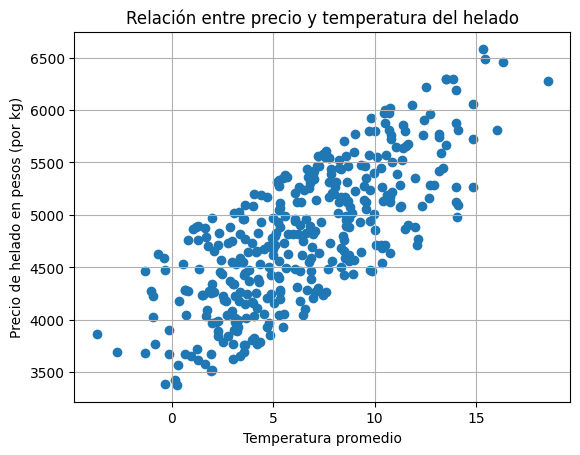


Precio minimo del helado: 3378.0
Precio maximo del helado: 6583.0


In [ ]:
# (Usado posteriormente para el número de números aleatorios a generar):
n_datos_de_ushuaia = len(temperatura_ushuaia)


# Pendiente: por cada aumento de un grado, aumenta un 3% el precio base del kilo de helado ($120)
# Intercepto: $4000 como precio base para los helados
pendiente = 4000*0.03
intercepto_base = 4000

# Para que se mantenga la reproductibilidad de los datos aleatorios
np.random.seed(31)

# Genero errores aleatorios para agregar variabilidad a los datos ficticios:
errores_aleatorios = np.random.randint(-750, 750, n_datos_de_ushuaia)

# Temperaturas promedio de la ciudad de ushuaia:
temperatura = temperatura_ushuaia['TPROMEDIO']


# Calculamos los precios usando nuestra función lineal:
precio_del_kilo_helado = pendiente  * temperatura + 4000 + errores_aleatorios

# Le mandamos los precios a la columna "Precio helado por kg" etc:
temperatura_ushuaia['PRECIO HELADO POR KG'] = precio_del_kilo_helado

# Y ahora visualizamos los datinhos:
plt.scatter(temperatura_ushuaia['TPROMEDIO'], temperatura_ushuaia['PRECIO HELADO POR KG'])
plt.xlabel("Temperatura promedio")
plt.ylabel("Precio de helado en pesos (por kg)")
plt.title("Relación entre precio y temperatura del helado")
plt.grid(1)
plt.show()


# Imprimo los precios minimos y maximos para determinar el rango de precios:
print(f"\nPrecio minimo del helado: {temperatura_ushuaia['PRECIO HELADO POR KG'].min()}")
print(f"Precio maximo del helado: {temperatura_ushuaia['PRECIO HELADO POR KG'].max()}")

 El rango de precios es de entre \$3378 a \$6583 y la pendiente es de $120 así que esa es la tasa de cambio por grado de temperatura. Ahora, vamos con la segunda parte.

<code>COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.</code>


- Crear una variable categorica binaria "COMPRA HELADO".

<br>

Leer este enunciado es lo peor que me paso en la vida y vivi muchas desgracias.

Luego de consultarlo con el profesor Miguel, quién escribio el cuaderno, lo que quiso decir es:

- Cúando el precio del helado esta por encima del 40% inicial, la probabilidad de <b>no</b> comprarlo es del 80%
- Cúando el precio del helado esta entre el precio inicial y por debajo de un aumento del 40%, la probabilidad <b>sí</b> comprarlo es del 80%

In [ ]:
## Antes de continuar con esta parte, voy a pedir aclaración de qué es lo que se quiso decir.

<p>3. GENERAR TRES PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:</p>

<ul><li>SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)</li>
</ul>

<p>4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.</p>